In [218]:
import random

from Bio import SeqIO
from Bio.Seq import Seq
import operator
import math

import Bio


out_string=[]
count_D=0
count_A=0
count_SZ=0

all=[]


with open("AJ_SNP.fasta") as input_handle:
    for record in SeqIO.parse(input_handle, "fasta"):
        cycle=random.randint(1,4)
        cycle=1
        
        for i in range(0,cycle):
            
            type_of_SNP=random.randint(1,3)
            
                #A
            if type_of_SNP==1:
                count_A+=1
                here= random.randint(0,len(record.seq)-1)
                out_seq=str(record.seq[:here])+random.choice(['A','C','G','T'])+str(record.seq[here:])
                
                #D
            elif type_of_SNP==2:
                count_D+=1
                here= random.randint(0,len(record.seq)-1)
                out_seq= str(record.seq[:here-1])+record.seq[here:]
                #SZ
            elif type_of_SNP==3:
                count_SZ+=1
                here= random.randint(0,len(record.seq)-1)

                if str(record.seq)[here] == 'A':
                    change_list = ['C','G','T']
                elif str(record.seq)[here] == 'T':
                    change_list = ['C','G','A']
                elif str(record.seq)[here] == 'G':
                    change_list = ['C','A','T']
                elif str(record.seq)[here] == 'C':
                    change_list = ['A','G','T']    
                out_seq= str(record.seq[:here-1])+random.choice(change_list)+record.seq[here:]
                
            pair=(here, type_of_SNP,str(record.description))
            all.append(pair)
            
        out_string.append(">"+record.description)
        out_string.append(str(out_seq))
        


In [219]:
print(count_A)
print(count_D)
print(count_SZ)
print(len(all))
print(len(out_string))
print(cycle)

78
83
66
227
454
1


In [220]:
print(all[:10])

[(99, 1, 'AJ518870.1.1407|Gordonibacter|S0E150'), (64, 2, 'AJ518870.1.1407|Gordonibacter|S6E156'), (68, 1, 'AJ518870.1.1407|Gordonibacter|S12E162'), (95, 3, 'AJ518870.1.1407|Gordonibacter|S18E168'), (12, 3, 'AJ518870.1.1407|Gordonibacter|S24E174'), (104, 1, 'AJ518870.1.1407|Gordonibacter|S30E180'), (72, 1, 'AJ518870.1.1407|Gordonibacter|S36E186'), (101, 1, 'AJ518870.1.1407|Gordonibacter|S42E192'), (82, 2, 'AJ518870.1.1407|Gordonibacter|S48E198'), (138, 1, 'AJ518870.1.1407|Gordonibacter|S54E204')]


In [222]:
out_file= open("ide_be/Pos_2.fasta","w")

for line in out_string:
    out_file.write(line)
    out_file.write('\n')

In [224]:
        
    
s_open= open("ide_be/Pos_2_once.sam",'r')
s_lines=s_open.readlines()
s_open.close()
line_counter=0
    
I=0
D=0
A=0
S=0

Cigar_strings=[]

for s in s_lines:
    line_counter+=1
    if s=="\n":
        print("a")
        break
    
    if len(s.split('	')) >=5:
        
        string_ = s.split('	')[5]
        Cigar_strings.append((s.split('	')[0] , string_, s.split('	')[2]))
        
        temp_i=0
        temp_d=0
        temp_s=0
        
        temp_i= string_.count('I')
        temp_d= string_.count('D')
        temp_s= string_.count('S')
        
        I+= temp_i
        S+= temp_s
        D+= temp_d
        
        if temp_i+temp_d+temp_s ==0:
            A+=1
        
        
            
    else:
        print(s)
        #break


In [225]:
print("Insertion: " + str(I))
print("Deletion:  "+ str(D))
print("SUB: "+ str(S))
print("Nothing: "+ str(A))
print(line_counter)
print(Cigar_strings[:30])

Insertion: 73
Deletion:  70
SUB: 14
Nothing: 71
227
[('AJ518870.1.1407|Gordonibacter|S0E150', '92M1D7M1I51M', 'LT900217.959149.960636'), ('AJ518870.1.1407|Gordonibacter|S6E156', '62M1D87M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S12E162', '68M1I82M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S18E168', '150M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S24E174', '150M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S30E180', '104M1I46M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S36E186', '71M1I79M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S42E192', '101M1I49M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S48E198', '80M1D69M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S54E204', '138M1I12M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S60E210', '150M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S66E216', '142M1I8M', 'AJ518870.1.1407'), ('AJ518870.1.1407|Gordonibacter|S72E222', '150M', 'AJ518870

In [231]:
s_open= open("ide_be/Pos_2_once.sam",'r')
s_lines=s_open.readlines()
s_open.close()
line_counter=0
    
I=0
D=0
A=0
S=0

mismatch_strings=[]

for s in s_lines:
    line_counter+=1
    if s=="":
        print("a")
        break
        
    #if len(s.split('	')) >=5:
    sam_line= s.split('	')
    for hh in sam_line:
        if hh[:2] == "MD":
            hhm= (s.split('	')[0],hh)
            mismatch_strings.append(hhm)
            break


In [232]:
print(len(mismatch_strings))
#relaítv mert 6ot nem alignolt ://

222


In [233]:
summa=[]
for occ in all[:]:
    for eset in mismatch_strings:
        if occ[2] == eset[0]:
                for cigar in Cigar_strings:
                    if cigar[0] == eset[0]:
                        summa.append((eset[0],occ[0],occ[1],cigar[1],eset[1],cigar[2]))
                        break
                break

In [195]:
summa=[]
for eset in mismatch_strings:
    for cigar in Cigar_strings:
            if cigar[0] == eset[0]:
                for occ in all[:]:
                    if occ[2] == eset[0]:
                        summa.append((eset[0],occ[0],occ[1],cigar[1],eset[1],cigar[2]))
                        break
                break

In [236]:
proba_str="AJ518870.1.1407|Gordonibacter|S0E150"

for this in all[:]:   
    if this[2] == proba_str:
        print(this)
print("_______________")
for this in mismatch_strings[:]:   
    if this[0] == proba_str:
        print(this)
print("_______________")        
for this in Cigar_strings[:]:   
    if this[0] == proba_str:
        print(this)
print("_______________")        

        

        
        
print(len(summa))

(99, 1, 'AJ518870.1.1407|Gordonibacter|S0E150')
_______________
('AJ518870.1.1407|Gordonibacter|S0E150', 'MD:Z:51C0G39^G58')
_______________
('AJ518870.1.1407|Gordonibacter|S0E150', '92M1D7M1I51M', 'LT900217.959149.960636')
_______________
222


In [314]:
fp=[]
tp=[]


#if asd[2]==1:
for asd in summa:
    
    if asd[0].split('|')[0] == asd[5]:
        match=asd[3].split('M')[0]
        
        if match.isdigit() == False:
            match= match.split('S')[-1]
            
        if asd[2] == 1:     
            #type 1
            if asd[1] == int(match) or asd[1]+1 == int(match) or asd[1]-1 == int(match):
                s_e=asd[0].split('|')[-1].split('S')[1].split('E')
                start= int(s_e[0])
                end=int(s_e[1])
                tp_pair=(start,end)
                tp.append(tp_pair)
                continue
            #type 2    
        elif asd[2] == 2:
            
            if asd[1] == int(match) or (asd[1]+2 >= int(match) and asd[1]-2 <= int(match)):
                s_e=asd[0].split('|')[-1].split('S')[1].split('E')
                start= int(s_e[0])
                end=int(s_e[1])
                tp_pair=(start,end)
                tp.append(tp_pair)
                continue
        
        elif asd[2] == 3:
            str_=""
            for char_ in list(asd[4]):
                if char_.isdigit():
                    str_ += char_
                else:
                    if len(str_) >0:
                        break
            
            match_3=str_
            
            if asd[1] == int(match_3) or (asd[1]+1 >= int(match_3) and asd[1]-1 <= int(match_3)):
                s_e=asd[0].split('|')[-1].split('S')[1].split('E')
                start= int(s_e[0])
                end=int(s_e[1])
                tp_pair=(start,end)
                tp.append(tp_pair)
                continue
        
        s_e=asd[0].split('|')[-1].split('S')[1].split('E')
        start= int(s_e[0])
        end=int(s_e[1])
        fp_pair=(start,end)    
        fp.append(fp_pair)
        
    else:
        
        s_e=asd[0].split('|')[-1].split('S')[1].split('E')
        start= int(s_e[0])
        
        end=int(s_e[1])
        fp_pair=(start,end)
        fp.append(fp_pair)
    
    

print(fp[:])
print(len(tp))



[(0, 150), (78, 228), (114, 264), (156, 306), (162, 312), (168, 318), (174, 324), (180, 330), (186, 336), (192, 342), (198, 348), (204, 354), (210, 360), (216, 366), (222, 372), (228, 378), (234, 384), (240, 390), (246, 396), (252, 402), (258, 408), (264, 414), (270, 420), (282, 432), (288, 438), (294, 444), (300, 450), (306, 456), (312, 462), (318, 468), (324, 474), (354, 504), (420, 570), (432, 582), (480, 630), (528, 678), (534, 684), (540, 690), (564, 714), (576, 726), (588, 738), (702, 852), (708, 858), (714, 864), (720, 870), (732, 882), (738, 888), (744, 894), (750, 900), (756, 906), (762, 912), (768, 918), (774, 924), (780, 930), (792, 942), (798, 948), (804, 954), (810, 960), (816, 966), (822, 972), (828, 978), (840, 990), (858, 1008), (864, 1014), (870, 1020), (876, 1026), (882, 1032), (888, 1038), (894, 1044), (900, 1050), (906, 1056), (912, 1062), (924, 1074), (942, 1092), (948, 1098), (954, 1104), (960, 1110), (966, 1116), (972, 1122), (978, 1128), (990, 1140), (996, 1146)

In [315]:
fp_diagram=[0]*2000

for f in fp:
    for s in range(f[0],f[1]):
        fp_diagram[s]+=1

tp_diagram =[0]*2000        
for t in tp:
    for h in range(t[0],t[1]):
        tp_diagram[h]+=1
    


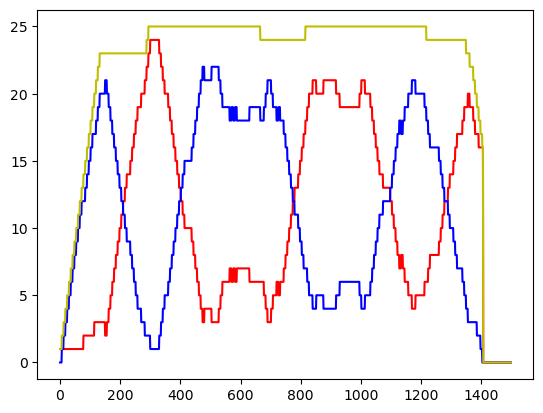

In [316]:
import numpy as np


plt.plot(fp_diagram[:1500], color='r', label='A')
plt.plot(tp_diagram[:1500], color='b', label='A')

cover_check= np.add(fp_diagram,tp_diagram)


plt.plot(cover_check[:1500], color='y', label='A')



227


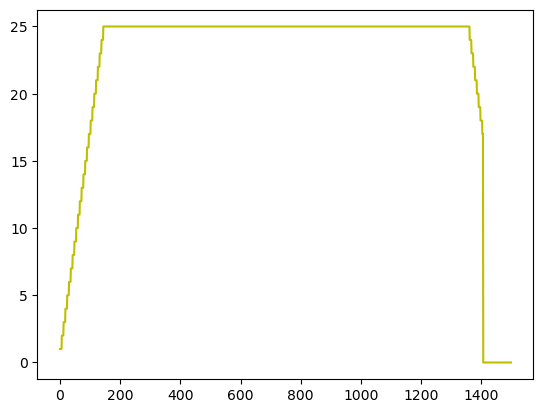

In [372]:
y=[]
in_fasta="Gordonibacter_reads.fasta"
with open(in_fasta) as input_handle:
    for record in SeqIO.parse(input_handle, "fasta"):
        if str(record.description.split('|')[0]) == 'AJ518870.1.1407':
            s_e=str(record.description).split('|')[-1].split('S')[1].split('E')
            start= int(s_e[0])
            end=int(s_e[1])
            y_pair=(start,end)
            y.append(y_pair)
        
print(len(y))


y_buckets=[0]*2000

for eset in y:
    for s in range(eset[0],eset[1]):
        y_buckets[s]+=1

plt.plot(y_buckets[:1500], color='y', label='A')

In [317]:
s_open= open("/home/csado7/biobox/csado7/GrapAligner_tests/Test_aln.gaf",'r')
s_lines=s_open.readlines()
s_open.close()
line_counter=0

prec=[]
for line in s_lines:
    if len(line.split('	')) >=15:
        prec.append(float(line.split('	')[15].split(':')[-1])) 

In [335]:
import re

s_open= open("/home/csado7/biobox/csado7/GrapAligner_tests/Test_aln.gaf",'r')
s_lines=s_open.readlines()
s_open.close()
line_counter=0

nodes=[]
for line in s_lines:
    if len(line.split('	')) >=15:
        node=line.split('	')[5][1:]
        more_node = re.split('<|>', node)
        
        for more in more_node:
            change = False
            for x in range(0,len(nodes)):
                if more == nodes[x][0]:
                    
                    nodes[x]= (nodes[x][0],nodes[x][1]+1)
                    change=True
                    break
            if change == False:
                nodes.append((more,0))
                    

('203', 771)
('1488', 0)


(array([743.,   8.,  12.,  14.,   5.,  10.,   4.,   3.,   6.,   7.,   7.,
          4.,   5.,   5.,   3.,   4.,   4.,   1.,   2.,   5.,   3.,   2.,
          1.,   6.,   2.,   4.,   3.,   4.,   2.,   2.,   2.,   4.,   5.,
          2.,   4.,   2.,   2.,   3.,   3.,   4.,   2.,   1.,   0.,   0.,
          3.,   2.,   2.,   2.,   1.,   4.,   1.,   2.,   0.,   4.,   2.,
          1.,   2.,   2.,   0.,   4.,   0.,   1.,   2.,   2.,   2.,   2.,
          3.,   2.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          2.,   2.,   0.,   1.,   3.,   0.,   2.,   2.,   2.,   2.,   1.,
          2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   7.71,  15.42,  23.13,  30.84,  38.55,  46.26,  53.97,
         61.68,  69.39,  77.1 ,  84.81,  92.52, 100.23, 107.94, 115.65,
        123.36, 131.07, 138.78, 146.49, 154.2 , 161.91, 169.62, 177.33,
        185.04, 192.75, 200.46, 208.17, 215.88, 223.59, 231.3 , 239.01,
        246.72, 254.43, 262.14

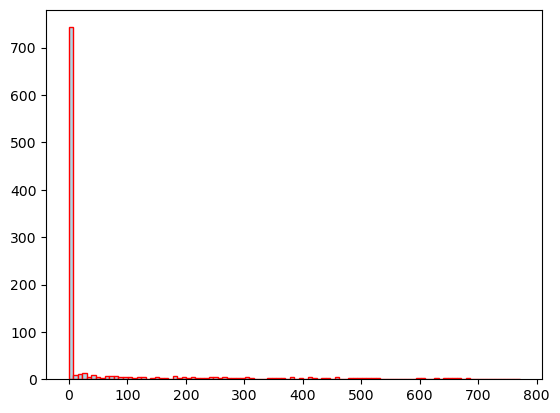

In [377]:
largest=(0,-1)

for em in nodes:
    if em[1] > largest[1] and not em[0] ==  'AJ518870.1.1407':
        largest = em
print(largest)

largest_node=(0,0)

for em in nodes:
    
    if not em[0] ==  'AJ518870.1.1407':
        if int(em[0]) > largest_node[1]:
            largest_node = em
            
#bucket_sort= [0]*largest_node[1]
bucket_sort= [0]*10000

for n in nodes:
    
    if not n[0] ==  'AJ518870.1.1407':
        if int(n[0]) >= len(bucket_sort):
            continue
        
        bucket_sort[int(n[0])] = n[1]

print(largest_node)

plt.hist(bucket_sort[10:1000], bins=100,color = "lightblue", ec="red")

9544


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 6.000e+00,
        0.000e+00, 1.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 5.000e+00, 9.000e+00,
        1.600e+01, 9.000e+00, 1.900e+01, 1.600e+01, 4.000e+00, 1.800e+01,
        2.600e+01, 4.000e+00, 3.400e+01, 2.400e+01, 2.300e+01, 3.500e+01,
        1.100e+01, 1.600e+01, 3.600e+01, 3.100e+01, 6.800e+01, 3.000e+00,
        3.300e+01, 7.400e+01, 9.000e+00, 6.500e+01, 9.900e+01, 1.100e+01,
        2.540e+02, 6.000e+00, 1.800e+0

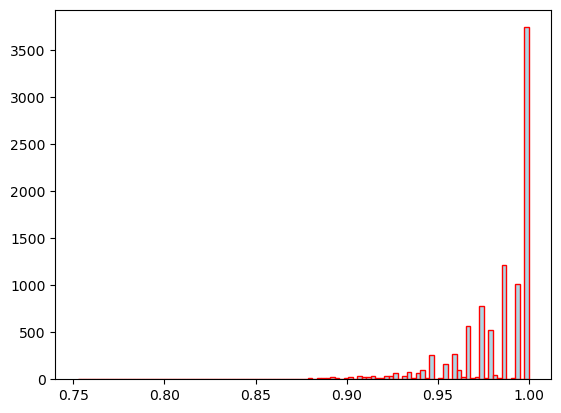

In [374]:
print(len(prec))

plt.hist(prec[:], bins=100,color = "lightblue", ec="red")